[b80 ”рок по Java 78 : ћногопоточность13: Conditions](#b80-”рок-по-Java-78-:-ћногопоточность13:-Conditions)  
[b81 ”рок по Java 79: ћногопоточность 14: Callable and Futures](#b81-”рок-по-Java-79:-ћногопоточность-14:-Callable-and-Futures)  
[b82 ”рок по Java 80: ћногопоточность 15: Executors](#b82-”рок-по-Java-80:-ћногопоточность-15:-Executors)  
[b83 ”рок по Java 81: ћногопоточность 16: ScheduledExcecuterService](#b83-”рок-по-Java-81:-ћногопоточность-16:-ScheduledExcecuterService)  
[b84 ”рок по Java 82: ћногопоточность 17: семофоры - Semofors](#b84-”рок-по-Java-82:-ћногопоточность-17:-семофоры---Semofors)  
[b85 ”рок по Java 83: ћногопоточность 18: CountDownLatch](#b85-”рок-по-Java-83:-ћногопоточность-18:-CountDownLatch)  
[b86 ”рок по Java 84: ћногопоточность 19: Exchenger](#b86-”рок-по-Java-84:-ћногопоточность-19:-Exchenger)  
[b87 ”рок по Java 85: ћногопоточность 20: CyclicBarier](#b87-”рок-по-Java-85:-ћногопоточность-20:-CyclicBarier)  
[b88 ”рок по Java 86: ћногопоточность 21: Phaser](#b88-”рок-по-Java-86:-ћногопоточность-21:-Phaser)  
[b89 ”рок по Java 87: ћногопоточность 22: BlockingQueue](#b89-”рок-по-Java-87:-ћногопоточность-22:-BlockingQueue)  
[b90 ”рок по Java 88: ћногопоточность 23: ThreadFactory](#b90-”рок-по-Java-88:-ћногопоточность-23:-ThreadFactory)  
[b91 ”рок по Java 89: ћногопоточность 24: ForkJoinFramework](#b91-”рок-по-Java-89:-ћногопоточность-24:-ForkJoinFramework)  
[b92 ”рок по Java 90: ћногопоточность 25: ThreadLocalRandom And TimeUnit](#b92-”рок-по-Java-90:-ћногопоточность-25:-ThreadLocalRandom-And-TimeUnit)  
[b93 ”рок по Java 91: Dynamic Proxy - динамические прокси.](#b93-”рок-по-Java-91:-Dynamic-Proxy---динамические-прокси.)  
[b94 ”рок по Java 92:  акие книги надо читать что бы стать Java программистом.](#b94-”рок-по-Java-92:-какие-книги-надо-читать-что-бы-стать-Java-программистом.)  
[b95 ”рок по Java 93: я буду выкладывать код на GitHub.](#b95-”рок-по-Java-93:-я-буду-выкладывать-код-на-GitHub.)  
[b96 ”рок по Java 94: —колько зарабатывают Java программисты в ”краине](#b96-”рок-по-Java-94:-—колько-зарабатывают-Java-программисты-в-”краине)  
[b97 ”рок по Java 95: как получить максимальную зарплату, при устройстве на работу программистом.](#b97-”рок-по-Java-95:-как-получить-максимальную-зарплату,-при-устройстве-на-работу-программистом.)  
[b98 ”рок по Java 96: Swing 1: HelloWorld](#b98-”рок-по-Java-96:-Swing-1:-HelloWorld)  
[b99 ”рок по Java 97: Swing 2: JComponent](#b99-”рок-по-Java-97:-Swing-2:-JComponent)  


#### b80 ”рок по Java 78 : ћногопоточность13: Conditions  

<details><pre>
public class Main {
    static Lock lock = new ReentrantLock();
    static Condition condition= lock.newCondition();
    static int account;
    public static void main(String[] args) {
        new AccountMinus().start();
        new AccountPlus().start();
    }

    static class AccountPlus extends Thread{
        @Override
        public void run() {
            lock.lock();
            account+=10;
            condition.signal();
            lock.unlock();
        }
    }

    static class AccountMinus extends Thread{
        @Override
        public void run() {
            if(account&lt;10){
                try {
                    lock.lock();
                    System.out.println(&quot;account = &quot;+account);
                    condition.await();
                    System.out.println(&quot;account = &quot;+account);
                    lock.unlock();
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
            account-=10;
        }
    }
}
</pre></details>

#### b81 ”рок по Java 79: ћногопоточность 14: Callable and Futures  
FutureTask -> Runnable  
call -> run  

для возвращения результата  
<details><pre>
public class Main {
    public static void main(String[] args) throws ExecutionException, InterruptedException {
        Callable&lt;Integer&gt; callable = new MyCallable();
        FutureTask futureTask = new FutureTask(callable);
        new Thread(futureTask).start();
        System.out.println(futureTask.get());
    }

    static class MyCallable implements Callable&lt;Integer&gt; {

        @Override
        public Integer call() throws Exception {
            int j = 0;
            for (int i = 0; i &lt; 10; i++,j++) {
                Thread.sleep(500);
            }
            return j;
        }
    }
}
//10
</pre></details>

#### b82 ”рок по Java 80: ћногопоточность 15: Executors  


<details><pre>
public class Main {
    public static void main(String[] args) throws ExecutionException, InterruptedException {
        ExecutorService executorService = Executors.newFixedThreadPool(2);
        executorService.submit(new MyRunnable());
        System.out.println(executorService.submit(new MyCallable()).get());
        executorService.shutdown();
        
    }

    static class MyRunnable implements Runnable{

        @Override
        public void run() {
            System.out.println(1);
        }
    }
    static class MyCallable implements Callable&lt;String&gt;{

        @Override
        public String call() throws Exception {
            return &quot;2&quot;;
        }
    }
}
//1
//2
</pre></details>

#### b83 ”рок по Java 81: ћногопоточность 16: ScheduledExcecuterService  


"<details><pre>
public class Main {
    public static void main(String[] args) throws InterruptedException {
        ScheduledExecutorService scheduledExecutorService = Executors.newSingleThreadScheduledExecutor();
        scheduledExecutorService.schedule(new MyThread(),3, TimeUnit.SECONDS);
        scheduledExecutorService.shutdown();
        System.out.println(2);
    }
    static class MyThread extends Thread{
        @Override
        public void run() {
            System.out.println(1);
        }
    }
}
//2
//1
</pre></details>

#### b84 ”рок по Java 82: ћногопоточность 17: семофоры - Semofors  


```
//Thread-0 eate at the table
//Thread-1 eate at the table
//1
//Thread-0 release table
//Thread-1 release table
//Thread-2 eate at the table
//Thread-4 eate at the table
//Thread-2 release table
//Thread-4 release table
//Thread-6 eate at the table
//Thread-5 eate at the table
//Thread-6 release table
//Thread-5 release table
//Thread-3 eate at the table
//Thread-3 release table
```
<details><pre>
public class Main {
    public static void main(String[] args) throws InterruptedException {
        Semaphore table = new Semaphore(2);

        Person person = new Person();
        Person person2 = new Person();
        Person person3 = new Person();
        Person person4 = new Person();
        Person person5 = new Person();
        Person person6 = new Person();
        Person person7 = new Person();

        person.table = table;
        person2.table = table;
        person3.table = table;
        person4.table = table;
        person5.table = table;
        person6.table = table;
        person7.table = table;

        person.start();
        person2.start();
        person3.start();
        person4.start();
        person5.start();
        person6.start();
        person7.start();
        
        System.out.println(1);
    }
}

class Person extends Thread{
    Semaphore table;
    @Override
    public void run() {
        try {
            table.acquire();
            System.out.println(this.getName()+&quot; eate at the table&quot;);
            sleep(1000);
            System.out.println(this.getName()+&quot; release table&quot;);
            table.release();
        } catch (InterruptedException e) {
            e.printStackTrace();
        }
    }
}
</pre></details>

#### b85 ”рок по Java 83: ћногопоточность 18: CountDownLatch  


"<details><pre>
//Thread-0 start work count= 3
//Thread-2 start work count= 3
//Thread-1 start work count= 3
//Thread-2 done work count= 3
//Thread-0 done work count= 3
//Thread-1 done work count= 1
//all jobs donepublic class Main {
    public static void main(String[] args) throws InterruptedException {
        CountDownLatch countDownLatch = new CountDownLatch(3);

        new Work(countDownLatch);
        new Work(countDownLatch);
        new Work(countDownLatch);

        countDownLatch.await();
        System.out.println(&quot;all jobs done&quot;);
    }
}

class Work extends Thread{
    CountDownLatch countDownLatch;

    public Work(CountDownLatch countDownLatch){
        this.countDownLatch = countDownLatch;
        start();
    }

    @Override
    public void run() {
        System.out.println(this.getName()+&quot; start work&quot;
                + &quot; count= &quot; + countDownLatch.getCount());
        try {
            sleep(3000);
        } catch (InterruptedException e) {
            e.printStackTrace();
        }

        System.out.println(this.getName()+&quot; done work&quot;
        + &quot; count= &quot; + countDownLatch.getCount()
        );
        countDownLatch.countDown();
    }
}
</pre></details>

#### b86 ”рок по Java 84: ћногопоточность 19: Exchenger  
обмен данными между потоками  

"<details><pre>
//1
//Hi my name is Mike
//I'm 20 eyars old
public class Main {
    public static void main(String[] args) throws InterruptedException {

        Exchanger&lt;String&gt; exchanger = new Exchanger&lt;&gt;();
        new Mike(exchanger);
        new Anket(exchanger);

        System.out.println(1);
    }

    static class Mike extends Thread{
        Exchanger&lt;String&gt; exchanger;

        public Mike(Exchanger&lt;String&gt; exchanger){
            this.exchanger = exchanger;
            start();
        }

        @Override
        public void run() {
            try {
                exchanger.exchange(&quot;Hi my name is Mike&quot;);
                sleep(3000);
                exchanger.exchange(&quot;I'm 20 eyars old&quot;);
            } catch (InterruptedException e) {
                e.printStackTrace();
            }
        }
    }

    static class Anket extends Thread{
        Exchanger&lt;String&gt; exchanger;
        public Anket(Exchanger&lt;String&gt; exchanger){
            this.exchanger = exchanger;
            start();
        }

        @Override
        public void run() {
            try {
                System.out.println(exchanger.exchange(null));
                System.out.println(exchanger.exchange(null));
            } catch (InterruptedException e) {
                e.printStackTrace();
            }
        }
    }
}
</pre></details>

#### b87 ”рок по Java 85: ћногопоточность 20: CyclicBarier  
3 потока запустились -> запускается Run

<details><pre>
//Thread-1 await
//Thread-3 await
//Thread-2 await
//Run is begun
public class Main {
    public static void main(String[] args) throws InterruptedException {
        CyclicBarrier cyclicBarrier = new CyclicBarrier(3,new Run());

        new Sportsman(cyclicBarrier);
        new Sportsman(cyclicBarrier);
        new Sportsman(cyclicBarrier);
    }

    static class Run extends Thread{
        @Override
        public void run() {
            System.out.println(&quot;Run is begun&quot;);
        }
    }

    static class Sportsman extends Thread{
        CyclicBarrier cyclicBarrier;
        public Sportsman(CyclicBarrier cyclicBarrier){
            this.cyclicBarrier = cyclicBarrier;
            start();
        }
        @Override
        public void run() {
            try {
                System.out.println(this.getName() + &quot; await&quot;);
                cyclicBarrier.await();
            } catch (InterruptedException e) {
                e.printStackTrace();
            } catch (BrokenBarrierException e) {
                e.printStackTrace();
            }
        }
    }
}
</pre></details>

#### b88 ”рок по Java 86: ћногопоточность 21: Phaser  
фазы  
3-машины 2 мойщика    
регистрируются 2 потока  

<details><pre>
//Thread-0 warshing car 0
//Thread-0 warshing car 1
//Thread-0 warshing car 2
//Thread-1 warshing car 0
//Thread-1 warshing car 1
//Thread-1 warshing car 2
//phaser.arriveAndAwaitAdvance();
//Thread-0 warshing car 0
//Thread-1 warshing car 0
//Thread-1 warshing car 1
//Thread-0 warshing car 1
//Thread-0 warshing car 2
//Thread-1 warshing car 2
public class Main {
    public static void main(String[] args) throws InterruptedException {
        Phaser phaser = new Phaser(2);
        new Washer(phaser);
        new Washer(phaser);
    }

    static class Washer extends Thread{
        Phaser phaser;
        public Washer(Phaser phaser){
            this.phaser = phaser;
            start();
        }

        @Override
        public void run() {
            for (int i = 0; i &lt;3 ; i++) {

            System.out.println(this.getName() +&quot; warshing car &quot;+i);
            phaser.arriveAndAwaitAdvance();
            }
        }
    }
}
</pre></details>

#### b89 ”рок по Java 87: ћногопоточность 22: BlockingQueue  
блокирующие очереди  
take 
- нечего брать, в спящий режим

"<details><pre>
//1
//Exception in thread &quot;Thread-0&quot; java.util.NoSuchElementException
//	at java.util.AbstractQueue.remove(AbstractQueue.java:117)
//	at com.company.l01.Main$1.run(Main.java:13)
public class Main {
    public static void main(String[] args) throws InterruptedException {

        Queue&lt;String&gt; queue = new PriorityQueue&lt;&gt;();
        new Thread(){
            @Override
            public void run() {
                System.out.println(queue.remove());
            }
        }.start();
        new Thread(){
            @Override
            public void run() {
                queue.add(&quot;This is string&quot;);
            }
        }.start();

        System.out.println(1);
    }
}
</pre></details>

"<details><pre>
//1
//This is string
public class Main {
    public static void main(String[] args) throws InterruptedException {

        BlockingQueue&lt;String&gt; queue = new PriorityBlockingQueue&lt;&gt;();
        new Thread(){
            @Override
            public void run() {
                try {
                    System.out.println(queue.take());
                } catch (InterruptedException e) {
                    e.printStackTrace();
                }
            }
        }.start();
        new Thread(){
            @Override
            public void run() {
                queue.add(&quot;This is string&quot;);
            }
        }.start();

        System.out.println(1);
    }
}
</pre></details>

#### b90 ”рок по Java 88: ћногопоточность 23: ThreadFactory  


"<details><pre>
//10
public class Main {
    public static void main(String[] args) throws InterruptedException {
        ThreadFactory threadFactory = new ThreadFactory() {
            @Override
            public Thread newThread(Runnable runnable) {
                Thread thread = new Thread(runnable);
                thread.setPriority(Thread.MAX_PRIORITY);
                return thread;
            }
        };
        threadFactory.newThread(new MyRun()).start();
    }
    static class MyRun implements Runnable{
        @Override
        public void run() {
            System.out.println(Thread.currentThread().getPriority());
        }
    }
}
</pre></details>

#### b91 ”рок по Java 89: ћногопоточность 24: ForkJoinFramework  


//Wed Jan 08 18:47:30 MSK 2020
//-5340232226128654848
//Wed Jan 08 18:47:38 MSK 2020
<details><pre>
public class Main {
    static long numOfOperations = 10_000_000_000L;
    public static void main(String[] args) throws InterruptedException {
        System.out.println(new Date());

        long j=0;
        for (long i = 0; i &lt; numOfOperations; i++) {
            j+=i;
        }
        System.out.println(j);
        System.out.println(new Date());
    }
}
</pre></details>

```
static int numOfThreads = Runtime.getRuntime().availableProcessors();
System.out.println(numOfThreads);
//4
```

```
if (операция разбита на достаточное количество частей) {
    выполняем операцию
}else {
    разбиваем на части
}
```

//стало
//Wed Jan 08 19:41:55 MSK 2020
//-5340232241128654848
//Wed Jan 08 19:41:59 MSK 2020
<details><pre>
//Wed Jan 08 18:47:30 MSK 2020
//-5340232226128654848
//Wed Jan 08 18:47:38 MSK 2020
//стало
//Wed Jan 08 19:41:55 MSK 2020
//-5340232241128654848
//Wed Jan 08 19:41:59 MSK 2020
public class Main {
    static long numOfOperations = 10_000_000_000L;

    static int numOfThreads = Runtime.getRuntime().availableProcessors();

    public static void main(String[] args) throws InterruptedException {
        System.out.println(new Date());




        ForkJoinPool pool = new ForkJoinPool(numOfThreads);
        System.out.println(pool.invoke(new MyFork(0, numOfOperations)));

        System.out.println(new Date());
    }
    static class MyFork extends RecursiveTask&lt;Long&gt;{
        long from,to;

        public MyFork(long from,long to) {
            this.from = from;
            this.to = to;
        }

        @Override
        protected Long compute() {
            if((to-from) &lt;= numOfOperations/numOfThreads){
                long j = 0;
                for (long i = from; i &lt; to; i++) {
                    j+=i;
                }
                return j;
            }else{
                long middle = (to+from)/2;
                MyFork firstHalf = new MyFork(from, middle);
                firstHalf.fork();
                MyFork secondHalf = new MyFork(middle+1,to);
                long secondValue = secondHalf.compute();
                return firstHalf.join()+secondValue;
            }
        }
    }
}
</pre></details>"


#### b92 ”рок по Java 90: ћногопоточность 25: ThreadLocalRandom And TimeUnit  


```
//for threads
System.out.println(ThreadLocalRandom.current().nextInt());
//for lockal
System.out.println(new Random().nextInt());
System.out.println(Math.random());
```

```
System.out.println(TimeUnit.DAYS.toMillis(1));
//86400000
```

#### b93 ”рок по Java 91: Dynamic Proxy - динамические прокси.  


"<details><pre>
package com.company.l02;


import java.lang.reflect.InvocationHandler;
import java.lang.reflect.Method;
//import java.lang.reflect.Proxy;
import java.lang.reflect.Proxy;
import java.util.concurrent.Callable;

public class Main {
    public static void main(String[] args) throws InterruptedException {
        InvocationHandler handler = new MyProxy(5);
        Class[] classes = new Class[] {Comparable.class, Callable.class};
        Object proxy = Proxy.newProxyInstance(null, classes, handler);
//        proxy.getClass();
//        proxy.toString();
//        System.out.println(proxy.toString());
        ((Comparable)proxy).compareTo(5);

    }

    static class MyProxy implements InvocationHandler{
        Object target;

        public MyProxy(Object target) {
            this.target = target;
        }

        @Override
        public Object invoke(Object o, Method method, Object[] objects) throws Throwable {
            System.out.println(objects);
            System.out.println(objects.length);
            return method.invoke(target,objects);
        }
    }

}
</pre></details>"


"<details><pre>
//https://habr.com/ru/company/otus/blog/434214/
//Динамический прокси Java: что это и как им пользоваться?
//Мы создаем и используем proxy для добавления и изменения функционала уже существующих классов.
//BEFORE
//Hallo
//AFTER
public class Main {
    interface If {
        void originalMethod(String s);
    }
    static class Original implements If {
        public void originalMethod(String s) {
            System.out.println(s);
        }
    }
    static class Handler implements InvocationHandler {
        private final If original;
        public Handler(If original) {
            this.original = original;
        }
        public Object invoke(Object proxy, Method method, Object[] args)
                throws IllegalAccessException, IllegalArgumentException,
                InvocationTargetException {
            System.out.println(&quot;BEFORE&quot;);
            method.invoke(original, args);
            System.out.println(&quot;AFTER&quot;);
            return null;
        }
    }
    public static void main(String[] args){
        Original original = new Original();
        Handler handler = new Handler(original);
        If f = (If) Proxy.newProxyInstance(If.class.getClassLoader(),
                new Class[] { If.class },
                handler);
        f.originalMethod(&quot;Hallo&quot;);
    }
}
</pre></details>

#### b94 ”рок по Java 92: какие книги надо читать что бы стать Java программистом.  


1 |2|3|4
------------|--------------|--------------|------
1| Core java Volume 1 | Horstmann  | 9 edition
2| Volume 2 |  | 
3| Oracle Certified Professional Java SE7 | Ganesh  | threads
4| SCJP Sun Certified Programmer for Java 6 Study Guide | Dathy Sierra | Exam 310-065 Best
5 | Maven: The Definitive Guide | O'Reilly | 
6 | Pro Git | Chacon | 
7 | Java 8 Lambdas | Richar Warburton | 
8 | JUnit inaction | Massol | 
9 | Hibernate in Action | Bauer | не читать
10 | Just Hibernate | Konda | 
11 | Spring in action | Walls | 
12 |  |  | 
13 |  |  | 
 |  |   | 
 

#### b95 ”рок по Java 93: я буду выкладывать код на GitHub.  


github.com/hacker85/javaLessons
[hacker85
/
JavaLessons](https://github.com/hacker85/javaLessons)

#### b96 ”рок по Java 94: —колько зарабатывают Java программисты в ”краине  


#### b97 ”рок по Java 95: как получить максимальную зарплату, при устройстве на работу программистом.  


#### b98 ”рок по Java 96: Swing 1: HelloWorld  


<details><pre>
import javax.swing.*;

public class Main {
    public static void main(String[] args){
        JFrame jFrame = new JFrame();
        jFrame.setVisible(true);
        jFrame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        jFrame.setSize(500,300);
        jFrame.setLocation(500,400);
        jFrame.setTitle(&quot;This My Application&quot;);
        System.out.println(111);
    }
}
</pre></details>

```
// jFrame.setLocation(60,20);
// jFrame.setSize(500,300);
jFrame.setBounds(60,20,500,300);
```

"<details><pre>
public class Main {
    public static void main(String[] args){
        JFrame jFrame = new JFrame();
        jFrame.setVisible(true);
        jFrame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        Toolkit toolkit = Toolkit.getDefaultToolkit();
        Dimension dimension = toolkit.getScreenSize();
        jFrame.setBounds(dimension.width/2-250,dimension.height/2-150,500,300);
        jFrame.setTitle(&quot;This My Application&quot;);
        System.out.println(111);
    }
}
</pre></details>

#### b99 ”рок по Java 97: Swing 2: JComponent  



<details><pre>
public class Main {
    public static void main(String[] args){
        JFrame jFrame = getFrame();
        System.out.println(111);
    }
    static JFrame getFrame(){
        JFrame jFrame = new JFrame();
        jFrame.setVisible(true);
        jFrame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        Toolkit toolkit = Toolkit.getDefaultToolkit();
        Dimension dimension = toolkit.getScreenSize();
        jFrame.setBounds(dimension.width/2-250,dimension.height/2-150,500,300);
        jFrame.setTitle(&quot;This My Application&quot;);
        return jFrame;
    }
}
</pre></details>

<details><pre>
public class Main {
    public static void main(String[] args){
        JFrame jFrame = getFrame();
//        showFonts();
        jFrame.add(new MyComponent());

        System.out.println(111);
    }

    static class MyComponent extends JComponent{
        @Override
        protected void paintComponent(Graphics graphics) {
            Font font = new Font(&quot;Monospaced&quot;,Font.BOLD,30);
            Graphics2D g2 = (Graphics2D)graphics;
            g2.setFont(font);
            g2.drawString(&quot;Hello&quot;, 0,20);
        }
    }

    static JFrame getFrame(){
        JFrame jFrame = new JFrame();
        jFrame.setVisible(true);
        jFrame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        Toolkit toolkit = Toolkit.getDefaultToolkit();
        Dimension dimension = toolkit.getScreenSize();
        jFrame.setBounds(dimension.width/2-250,dimension.height/2-150,500,300);
        jFrame.setTitle(&quot;This My Application&quot;);
        return jFrame;
    }
    static void showFonts(){
        String[] fonts = GraphicsEnvironment.getLocalGraphicsEnvironment().getAvailableFontFamilyNames();
        for(String s:fonts)
            System.out.println(s);
    }
}
</pre></details>

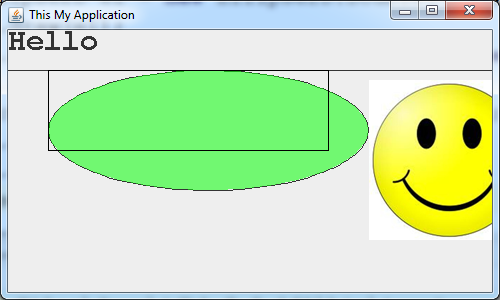

"<details><pre>
public class Main {
    public static void main(String[] args){
        JFrame jFrame = getFrame();
//        showFonts();
        jFrame.add(new MyComponent());

        System.out.println(111);
    }

    static class MyComponent extends JComponent{
        @Override
        protected void paintComponent(Graphics graphics) {
            Font font = new Font(&quot;Monospaced&quot;,Font.BOLD,30);
            Graphics2D g2 = (Graphics2D)graphics;
            g2.setFont(font);
            g2.drawString(&quot;Hello&quot;, 0,20);
            Point2D p1 = new Point2D.Double(0,40);
            Point2D p2 = new Point2D.Double(500,40);
            Line2D l2 = new Line2D.Double(p1,p2);
            g2.draw(l2);
            Ellipse2D el = new Ellipse2D.Double(40,40,320,120);
            g2.draw(el);
            g2.setPaint(new Color(0x8F0FFF0F,true));
            g2.fill(el);
            Rectangle2D r = new Rectangle2D.Double();
            p1.setLocation(40,40);
            p2.setLocation(320,120);
            r.setFrameFromDiagonal(p1,p2);
            g2.setPaint(Color.BLACK);
            g2.draw(r);

            try {
                URL url = new URL(&quot;http://ssf.com.mx/images/languages/14.png&quot;);
//                Image image = new ImageIcon(url).getImage();
                Image image = new ImageIcon(&quot;saved.png&quot;).getImage();
                g2.drawImage(image,361,50,null);
            } catch (MalformedURLException e) {
                e.printStackTrace();
            }

        }
    }

    static JFrame getFrame(){
        JFrame jFrame = new JFrame();
        jFrame.setVisible(true);
        jFrame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        Toolkit toolkit = Toolkit.getDefaultToolkit();
        Dimension dimension = toolkit.getScreenSize();
        jFrame.setBounds(dimension.width/2-250,dimension.height/2-150,500,300);
        jFrame.setTitle(&quot;This My Application&quot;);
        return jFrame;
    }
    static void showFonts(){
        String[] fonts = GraphicsEnvironment.getLocalGraphicsEnvironment().getAvailableFontFamilyNames();
        for(String s:fonts)
            System.out.println(s);
    }
}
</pre></details>

[]()  
[]()  
[]()  
[JAVA AWT | ЦВЕТОВОЙ КЛАСС](http://espressocode.top/java-awt-color-class/)  
[Подключение OpenGL в IntelliJ IDEA](http://grafika.me/node/766)  
[Уроки по Java](https://www.youtube.com/watch?v=uXMTq81jG7Y&list=PL786bPIlqEjRDXpAKYbzpdTaOYsWyjtCX&index=1)  


[]()  
[]()  
[]()  
[]()  
[]()  
```

```